# initial data exploration


In [4]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [5]:
connection = sqlalchemy.create_engine("postgresql://tcosse:mysecretpassword@db_container:5432/piscineds")

In [6]:
data = pd.read_sql_query("SELECT event_time, user_id, price, user_session from customers where event_type = 'purchase'", con=connection)
freq = data.groupby('user_id').count()
freq = freq['event_time'][freq['event_time'] <= 40].tolist()

print(freq)

[4, 2, 17, 4, 2, 3, 2, 8, 7, 8, 3, 5, 1, 15, 23, 18, 4, 2, 7, 10, 9, 4, 11, 2, 2, 22, 15, 3, 14, 14, 20, 6, 6, 7, 1, 25, 9, 4, 10, 40, 27, 29, 4, 8, 9, 2, 12, 4, 9, 3, 1, 3, 19, 1, 4, 10, 6, 11, 12, 2, 4, 2, 3, 6, 7, 10, 5, 14, 5, 11, 5, 1, 13, 27, 16, 3, 3, 13, 11, 15, 5, 3, 3, 8, 7, 7, 40, 37, 12, 16, 22, 7, 5, 4, 20, 6, 37, 17, 20, 4, 4, 7, 6, 4, 10, 4, 8, 3, 4, 6, 12, 1, 2, 24, 9, 36, 5, 1, 11, 14, 1, 27, 12, 31, 21, 3, 27, 1, 3, 20, 12, 3, 23, 9, 14, 14, 12, 4, 4, 21, 11, 1, 3, 15, 2, 10, 11, 4, 6, 11, 12, 21, 3, 20, 4, 2, 13, 31, 9, 29, 6, 21, 13, 5, 1, 3, 2, 4, 1, 5, 2, 4, 2, 8, 7, 2, 14, 3, 15, 17, 4, 3, 21, 1, 3, 10, 19, 21, 6, 22, 1, 15, 1, 34, 37, 8, 11, 12, 5, 27, 27, 24, 3, 4, 9, 6, 27, 8, 24, 6, 6, 10, 5, 1, 9, 3, 8, 5, 2, 2, 26, 8, 11, 6, 3, 8, 3, 9, 4, 3, 9, 2, 31, 6, 17, 5, 10, 3, 4, 18, 19, 10, 11, 16, 7, 18, 7, 5, 24, 26, 2, 17, 2, 13, 30, 11, 13, 10, 8, 15, 34, 1, 4, 10, 3, 6, 8, 18, 4, 5, 14, 2, 10, 22, 24, 18, 38, 10, 1, 4, 40, 20, 4, 3, 11, 24, 4, 4, 3, 15, 7, 3,

## Bar Chart

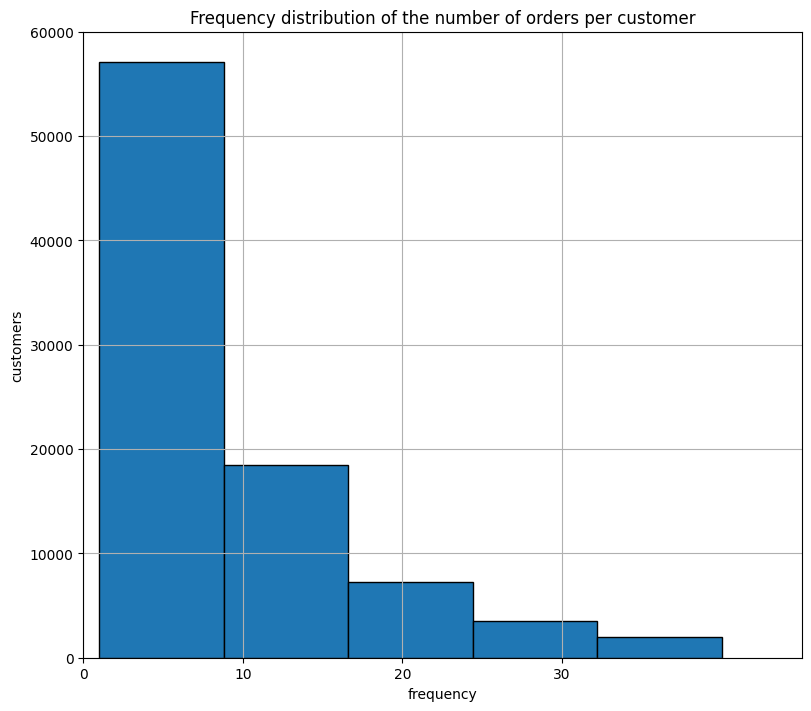

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout='constrained')

ax.grid(True, zorder=-1)
ax.hist(freq, bins=5, edgecolor='k')
ax.set_ylabel('customers')
ax.set_xlabel('frequency')
ax.set_xticks(range(0, 39, 10), range(0, 39, 10))
ax.set_xlim(0, 45)
ax.set_ylim(0, 60000)
ax.set_title('Frequency distribution of the number of orders per customer')

plt.show()

In [8]:
price = data['price'].groupby([data['user_id']]).sum()
print(price)
price = price.values[price.values <= 225].tolist()

print(price)

user_id
9794320       12.68
10079204      25.81
10280338      72.93
12055855      16.54
12936739      29.89
              ...  
608807757     40.81
608809325    207.94
608809552     15.81
608812129     23.65
608817151      8.64
Name: price, Length: 92652, dtype: float64
[12.68, 25.810000000000002, 72.93, 16.54, 29.89, 35.71, 20.31, 80.28999999999999, 21.810000000000002, 22.13, 22.139999999999997, 29.12, 20.63, 49.38, 81.05, 41.68, 14.43, 15.879999999999999, 24.44, 125.39, 31.310000000000002, 27.7, 28.19, 19.91, 10.89, 89.67, 38.49, 11.34, 44.5, 77.24000000000001, 34.71, 23.950000000000003, 20.04, 56.230000000000004, 17.46, 125.82, 72.96, 49.93, 52.53, 218.44, 48.58, 67.79, 11.18, 42.56, 47.839999999999996, 12.62, 32.25, 23.650000000000002, 10.01, 23.02, 20.0, 135.82, 9.68, 87.52, 2.22, 214.96, 38.72, 33.06, 23.29, 54.61, 71.05, 22.22, 8.57, 8.45, 31.41, 89.37, 24.61, 97.11, 41.79, 103.99, 17.39, 34.64, 11.48, 8.25, 94.65, 163.01, 94.87, 40.08, 53.75, 73.29, 30.91, 223.60999999999999, 2

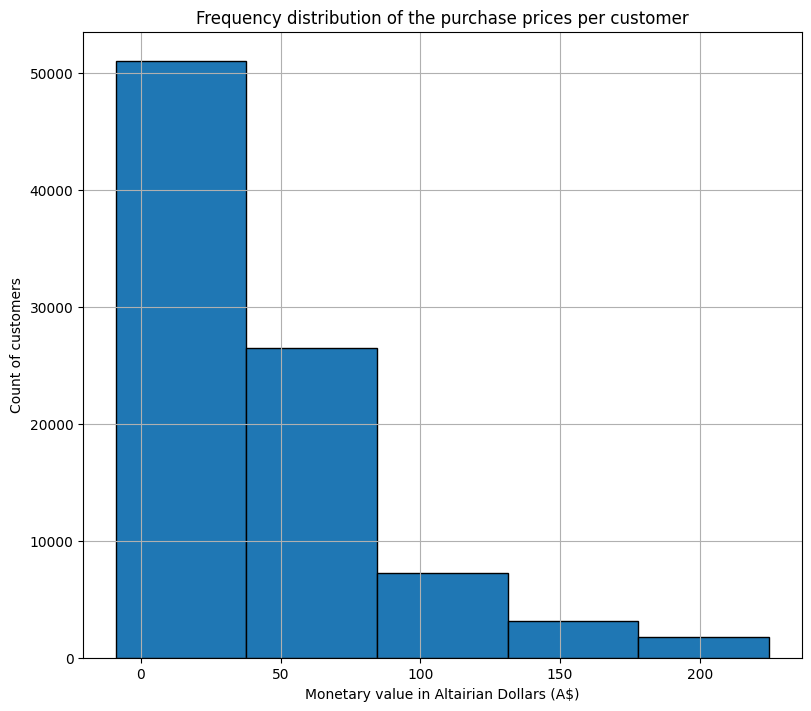

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout='constrained')

ax.grid(True, zorder=-1)
ax.hist(price, bins=5, edgecolor='k')
ax.set_ylabel('Count of customers')
ax.set_xlabel('Monetary value in Altairian Dollars (A$)')
ax.set_title('Frequency distribution of the purchase prices per customer')

plt.show()